In [301]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import glob
import os
import json as js



us_youtube_df = pd.read_csv('../data/USvideos.csv')
us_youtube_df.sample(5)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5187,AgrK2P3Ruug,17.09.12,Saoirse Ronan says first-time movie director G...,Good Morning America,24,2017-12-04T15:15:15.000Z,"Saoirse|""Ronan""|""Lady""|""Bird""|""live""|""movie""|""...",10511,110,1,7,https://i.ytimg.com/vi/AgrK2P3Ruug/default.jpg,False,False,False,The two-time Oscar nominated actress talked to...
30865,S4vxoP-IF2M,18.25.04,How the Squid Lost Its Shell,PBS Eons,28,2018-04-17T21:22:11.000Z,"dinosaurs|""dinos""|""paleo""|""paleontology""|""scis...",579181,21168,445,1555,https://i.ytimg.com/vi/S4vxoP-IF2M/default.jpg,False,False,False,"The ancestors of modern, squishy cephalopods l..."
31989,4_eVvzrTV-I,18.01.05,Shaquem Griffin Gets Selected by the Seattle S...,NFL,17,2018-04-28T18:18:40.000Z,"NFL|""Football""|""American Football""|""sport""|""sp...",229528,3165,73,502,https://i.ytimg.com/vi/4_eVvzrTV-I/default.jpg,False,False,False,"The Seattle Seahawks selected UCF linebackers,..."
35983,1PhPYr_9zRY,18.21.05,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",4803962,527245,2688,49369,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ..."
39696,NjMd89dggAk,18.08.06,Shawn Mendes - In My Blood (Live From The Bill...,ShawnMendesVEVO,10,2018-05-21T16:40:16.000Z,"Shawn Mendes|""Khalid""|""Youth""|""In My Blood""|""B...",551758,24811,1075,867,https://i.ytimg.com/vi/NjMd89dggAk/default.jpg,False,False,False,Pre-order Shawn Mendes: The Album here now: ht...


In [302]:
# Identify top 10 key influencers
# correlating publish time and views to determine most popular time for viewing content
# correlating/counting views, likes, dislikes, comments
# add csv for titles of youtube video id
us_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [303]:
#Who are the top 10 YouTube Channels based off likes.

sort_by_likes = us_youtube_df[['channel_title', 'likes']].sort_values('likes', ascending=False)
sort_by_likes.sample(10)


,channel_title,likes
12227,Refinery29,1999
24610,Vox,13309
19213,Jackie Aina,43837
21161,Inside Edition,10911
9279,WWE,13329
20905,Allure,9807
22853,Variety,2447
1512,Atlantic Records,45383
33540,Clash Royale,160002
2589,ESPN,212


In [304]:
popular_by_likes = (
    sort_by_likes
        .groupby(by='channel_title')
        .sum()
        .sort_values(by='likes', ascending=False)
        .head(10)
    )
popular_by_likes


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


In [305]:
#Who are the top 10 YouTube Channels based off views and likes.

sort_by_views = us_youtube_df[['channel_title', 'views','likes']].groupby('channel_title').sum().sort_values(by='views', ascending=False).head(10)
sort_by_views

,views,likes
channel_title,,
ChildishGambinoVEVO,3758488765,96700818
ibighit,2235906679,199247121
Dude Perfect,1870085178,60275557
Marvel Entertainment,1808998971,55873344
ArianaGrandeVevo,1576959172,52170970
MalumaVEVO,1551515831,23278380
jypentertainment,1486972132,44900910
Sony Pictures Entertainment,1432374398,30106808
FoxStarHindi,1238609854,23762509


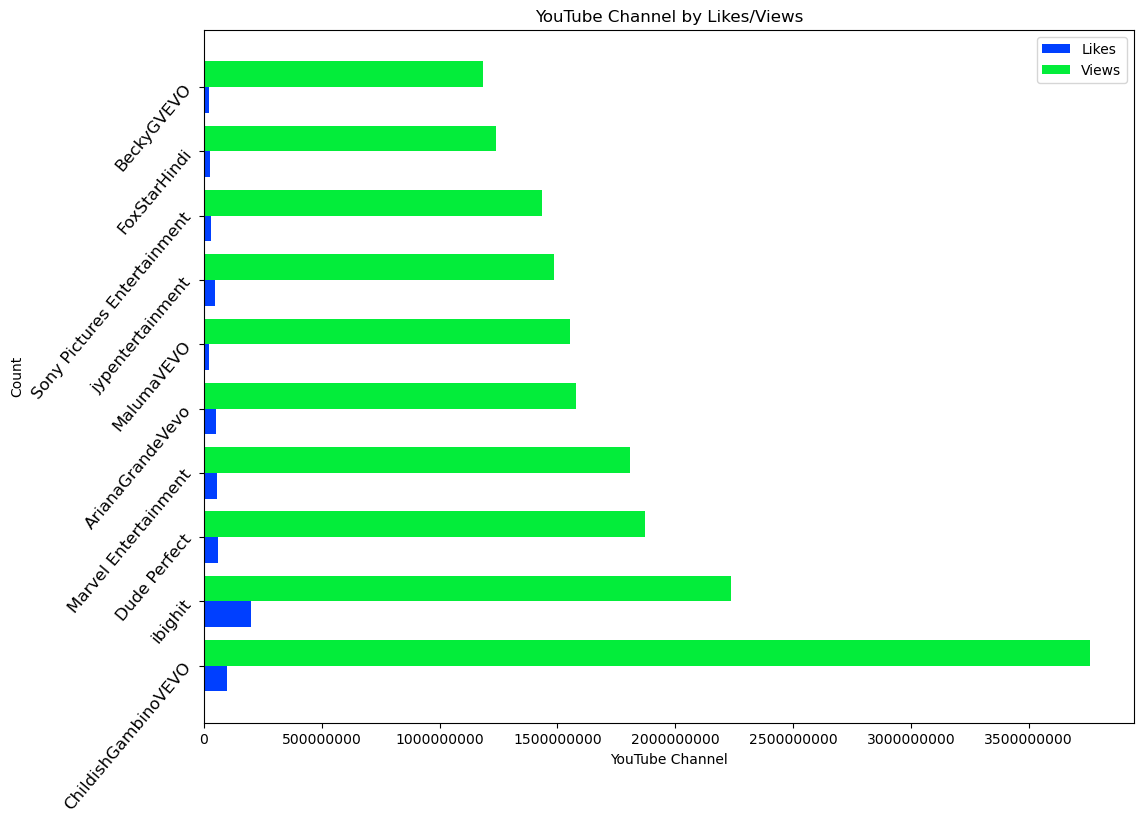

In [306]:
#Graphing Top Channels by views and likes
fig, ax = plt.subplots(figsize=(12,9))
likes = sort_by_views['likes']
views = sort_by_views['views']
chan_name = sort_by_views.index
  
chan_name_axis = np.arange(len(chan_name))
  
plt.barh(chan_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(chan_name_axis + 0.2, views, 0.4, label = 'Views')
plt.ticklabel_format(axis='x',style='plain')
#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
plt.yticks(chan_name_axis, chan_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("YouTube Channel")
plt.ylabel("Count")
plt.title("YouTube Channel by Likes/Views")
plt.legend()
plt.show()


In [307]:
#Styling graph
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-bright')


In [308]:
#Created hour column to determine correlation between views/likes/comments/time
us_youtube_df['hour'] = pd.DatetimeIndex(us_youtube_df['publish_time']).hour
us_youtube_df['hour']
us_youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,18


In [309]:
#Aggregating all engagement variables IOT caluclate correlations
views_times_corr = us_youtube_df.groupby(by='hour').sum()
views_times_corr.reset_index(inplace=True)
views_times_corr = views_times_corr[['views','likes','dislikes','comment_count','hour']]
views_times_corr


,views,likes,dislikes,comment_count,hour
0,2102430591,73069720,3493351,9796941,0
1,2608009982,74352959,4767974,8664745,1
2,1963268573,45572875,1324981,5331817,2
3,2722928516,68135410,3190260,6852700,3
4,9267508289,274128766,13279444,26177737,4
5,2987912716,105412432,4580425,9429649,5
6,871993900,17900061,867398,1543115,6
7,2903306925,65500127,2924998,5763321,7
8,2693147800,69970016,3587501,7430604,8
9,3477575589,160007663,4947730,27064292,9


<AxesSubplot:>

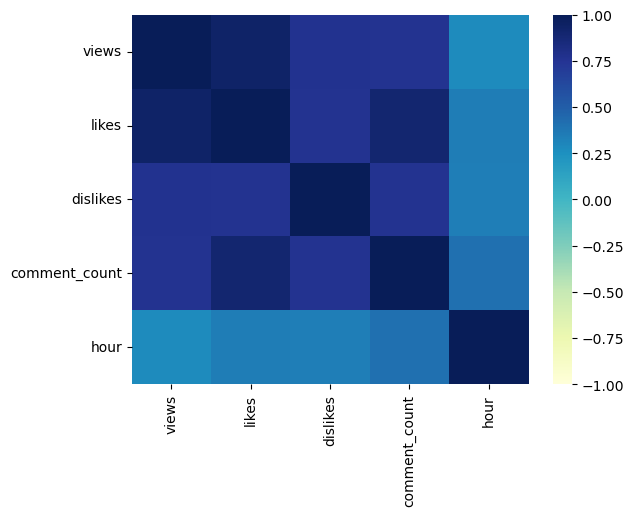

In [310]:
#Creating Correlation graph
sns.heatmap(views_times_corr.corr(),vmin=-1,cmap='YlGnBu')

In [311]:
#Ingesting JSON file to create Catgory by name column 
id_list = (
    us_youtube_df
        .groupby(by=['category_id'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
id_list.reset_index(inplace=True)

with open ('../data/US_category_id.json') as f:
    data = js.loads(f.read())
us_json_df = pd.json_normalize(data, record_path=['items'])

title_id = us_json_df[['id','snippet.title']].set_index('id')
title_id

title_id.index = title_id.index.astype('int64')
title_id_dict = title_id.to_dict()
title_id_dict['snippet.title']

id_list['category_id_name'] = id_list['category_id'].replace(title_id_dict['snippet.title'])
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [314]:
#Sorting new dataframe with category column by views
id_list.sort_values(by='views',ascending=False)


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [315]:
id_list_all_vars = id_list[[
                'category_id_name',
                'likes',
                'views',
                            ]]
id_list_all_vars = id_list_all_vars.set_index('category_id_name')
id_list_all_vars.sort_values(by='views',ascending=False)

,likes,views
category_id_name,,
Music,1416838584,40132892190
Entertainment,530516491,20604388195
Film & Animation,165997476,7284156721
Comedy,216346746,5117426208
People & Blogs,186615999,4917191726
Sports,98621211,4404456673
Howto & Style,162880075,4078545064
Science & Technology,82532638,3487756816
Gaming,69038284,2141218625


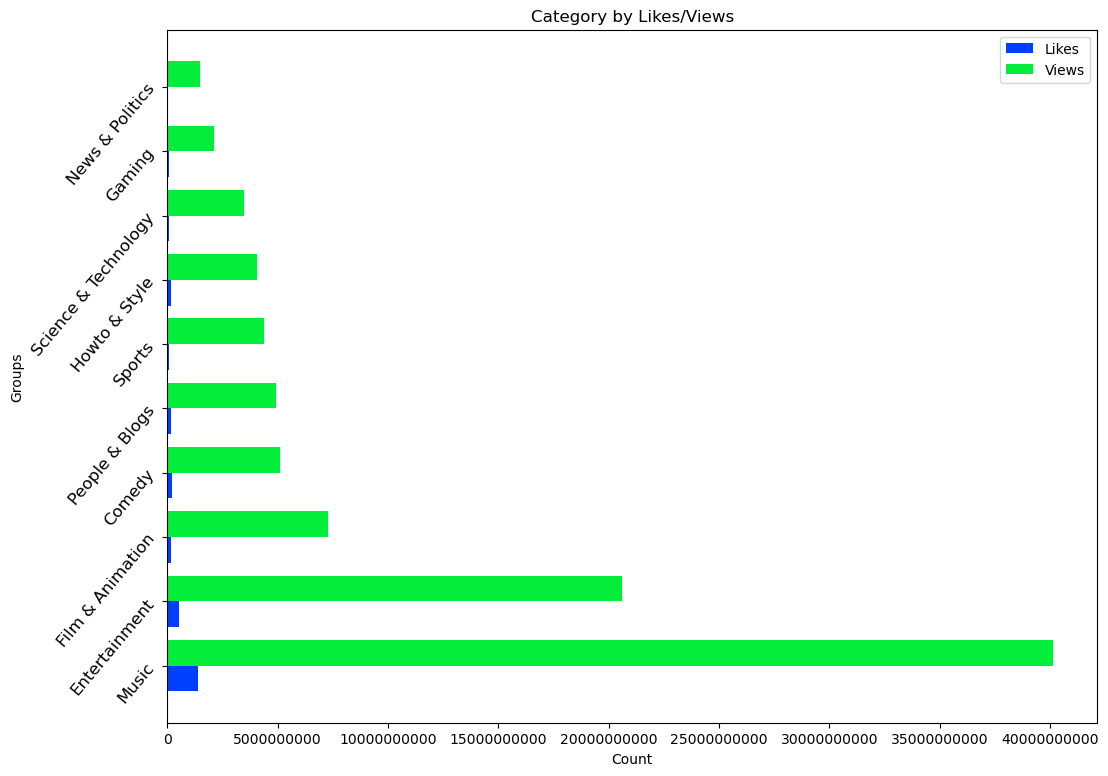

In [316]:
fig, ax = plt.subplots(figsize=(12,9))
likes = id_list_all_vars['likes']
views = id_list_all_vars['views']
cat_name = id_list_all_vars.index
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
cat_name_axis = np.arange(len(cat_name))
  
plt.barh(cat_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(cat_name_axis + 0.2, views, 0.4, label = 'Views')

#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
ax.ticklabel_format(axis='x',style='plain')
plt.yticks(cat_name_axis, cat_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("Count")
plt.ylabel("Groups")
plt.title("Category by Likes/Views")
plt.legend()
plt.show()

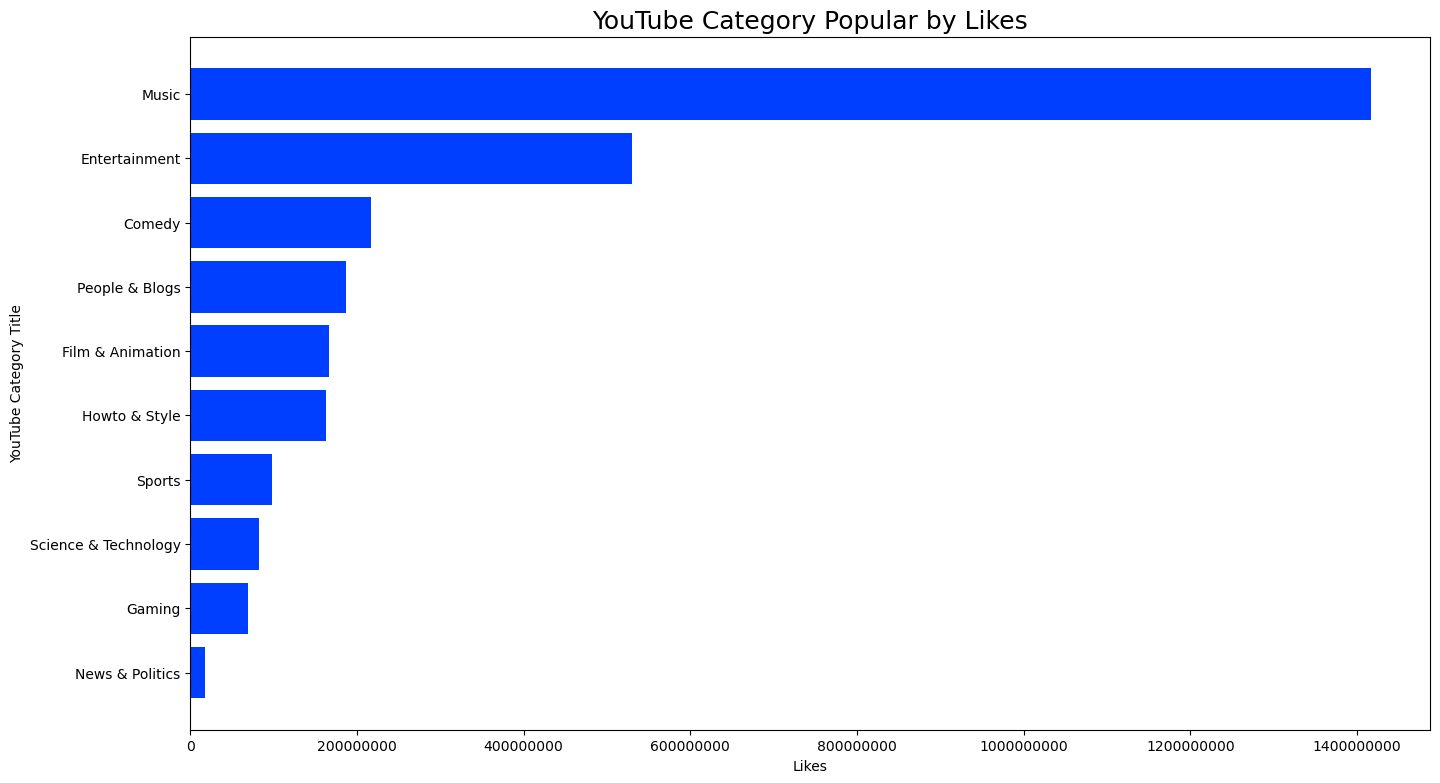

In [317]:
fig, ax = plt.subplots(figsize=(16,9))
id_list_all_vars = id_list_all_vars.sort_values('likes', ascending=True)
ax.barh(id_list_all_vars.index, id_list_all_vars['likes'])
ax.set_title('YouTube Category Popular by Likes', fontsize=18)
ax.set_ylabel('YouTube Category Title',)
ax.set_xlabel("Likes")
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/YouTube Category Popular by Likes.jpg', bbox_inches = 'tight')
plt.show()